In [1]:
'''add clolumns of packets -> make one column
remove added columns
remove time and date columns
one hot encoding -> location column'''

'add clolumns of packets -> make one column\nremove added columns\nremove time and date columns\none hot encoding -> location column'

In [2]:
import numpy as np
import pandas as pd
import tensorflow as keras
from matplotlib import pyplot as plt

In [3]:
import pandas as pd

# Read the CSV file with the specified encoding
df = pd.read_csv("dataset.csv", encoding='latin1')
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,Start time (UTC)/yyyy-mm-dd,Start time (UTC)/hh:mm:ss,Duration/h:mm:ss,Pkt loss/fraction/×10-2,Total and fraction of traffic/IPv4/pkts,Total and fraction of traffic/IPv4/×10-2,Total and fraction of traffic/IPv6/pkts,Total and fraction of traffic/IPv6/×10-4,Total and fraction of traffic/other/pkts,Total and fraction of traffic/other/×10-4,...,Mean transmission rate/bits/s,Mean transmission rate/load,flows/s,Packet size (bytes)/IPv4/Mean,Packet size (bytes)/IPv4/Median,Packet size (bytes)/IPv6/Mean,Packet size (bytes)/IPv6/Median,Packet size (bytes)/CDF,Packet size (bytes)/data,Location
1,2018-12-20,12:59:09,+01:02:00,0.2,2352824016,98.76,29447517,123.61,0,0.00,...,4.55 G,45.7 %,37.39 k,896,1.40 k,244,129,graph,file,nyc (dirA)
2,2018-11-15,12:59:10,+01:01:59,0.1,2280990208,98.83,26951188,116.78,0,0.00,...,4.49 G,45.1 %,31.80 k,913,1.40 k,243,129,graph,file,nyc (dirA)
3,2018-10-18,12:59:09,+01:01:59,0.1,2366521520,99.16,19977497,83.71,0,0.00,...,4.37 G,43.9 %,35.41 k,857,1.38 k,322,126,graph,file,nyc (dirA)
4,2018-09-21,12:59:09,+01:01:59,0.0,2082250512,98.24,37295547,175.96,0,0.00,...,3.53 G,35.5 %,42.08 k,785,865,217,127,graph,file,nyc (dirA)


In [4]:
df.columns = df.iloc[0]
df = df.iloc[1:]
df

,Start time (UTC)/yyyy-mm-dd,Start time (UTC)/hh:mm:ss,Duration/h:mm:ss,Pkt loss/fraction/×10-2,Total and fraction of traffic/IPv4/pkts,Total and fraction of traffic/IPv4/×10-2,Total and fraction of traffic/IPv6/pkts,Total and fraction of traffic/IPv6/×10-4,Total and fraction of traffic/other/pkts,Total and fraction of traffic/other/×10-4,...,Mean transmission rate/bits/s,Mean transmission rate/load,flows/s,Packet size (bytes)/IPv4/Mean,Packet size (bytes)/IPv4/Median,Packet size (bytes)/IPv6/Mean,Packet size (bytes)/IPv6/Median,Packet size (bytes)/CDF,Packet size (bytes)/data,Location
1,2018-12-20,12:59:09,+01:02:00,0.2,2352824016,98.76,29447517,123.61,0,0.00,...,4.55 G,45.7 %,37.39 k,896,1.40 k,244,129,graph,file,nyc (dirA)
2,2018-11-15,12:59:10,+01:01:59,0.1,2280990208,98.83,26951188,116.78,0,0.00,...,4.49 G,45.1 %,31.80 k,913,1.40 k,243,129,graph,file,nyc (dirA)
3,2018-10-18,12:59:09,+01:01:59,0.1,2366521520,99.16,19977497,83.71,0,0.00,...,4.37 G,43.9 %,35.41 k,857,1.38 k,322,126,graph,file,nyc (dirA)
4,2018-09-21,12:59:09,+01:01:59,0.0,2082250512,98.24,37295547,175.96,0,0.00,...,3.53 G,35.5 %,42.08 k,785,865,217,127,graph,file,nyc (dirA)
5,2018-08-16,12:59:10,+01:01:59,0.0,2299798253,99.07,21660733,93.31,0,0.00,...,4.45 G,44.7 %,29.24 k,896,1.40 k,408,129,graph,file,nyc (dirA)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,2003-04-24,07:00:00,+00:59:59,0.0,84581389,100.00,0,0.00,0,0.00,...,95.29 M,3.8 %,,507,64,0,0,graph,file,oc48-mfn (dirA)
357,2003-01-15,17:59:34,+01:01:59,0.0,219709440,100.00,0,0.00,0,0.00,...,321.57 M,12.9 %,,681,315,0,0,graph,file,oc48-mfn (dirA)
358,2002-08-14,16:00:00,+07:59:59,0.0,2143712932,100.00,0,0.00,0,0.00,...,352.43 M,14.2 %,,592,205,0,0,graph,file,oc48-mfn (dirA)
359,2003-01-15,17:59:37,+01:01:59,0.0,257097728,100.00,0,0.00,0,0.00,...,269.04 M,10.8 %,,487,59,0,0,graph,file,oc48-mfn (dirB)


In [5]:
df = df.drop(df.columns[[0,1, 2,8, -2,-3]], axis=1)
df.head()

,Pkt loss/fraction/×10-2,Total and fraction of traffic/IPv4/pkts,Total and fraction of traffic/IPv4/×10-2,Total and fraction of traffic/IPv6/pkts,Total and fraction of traffic/IPv6/×10-4,Total and fraction of traffic/other/×10-4,Mean transmission rate/pkts/s,Mean transmission rate/bits/s,Mean transmission rate/load,flows/s,Packet size (bytes)/IPv4/Mean,Packet size (bytes)/IPv4/Median,Packet size (bytes)/IPv6/Mean,Packet size (bytes)/IPv6/Median,Location
1,0.2,2352824016,98.76,29447517,123.61,0.00,640.22 k,4.55 G,45.7 %,37.39 k,896,1.40 k,244,129,nyc (dirA)
2,0.1,2280990208,98.83,26951188,116.78,0.00,620.41 k,4.49 G,45.1 %,31.80 k,913,1.40 k,243,129,nyc (dirA)
3,0.1,2366521520,99.16,19977497,83.71,0.00,641.53 k,4.37 G,43.9 %,35.41 k,857,1.38 k,322,126,nyc (dirA)
4,0.0,2082250512,98.24,37295547,175.96,0.00,569.77 k,3.53 G,35.5 %,42.08 k,785,865,217,127,nyc (dirA)
5,0.0,2299798253,99.07,21660733,93.31,0.00,624.05 k,4.45 G,44.7 %,29.24 k,896,1.40 k,408,129,nyc (dirA)


In [6]:
df['Total and fraction of traffic/IPv4/pkts'] = df['Total and fraction of traffic/IPv4/pkts'].astype(float)
df['Total and fraction of traffic/IPv6/pkts'] = df['Total and fraction of traffic/IPv6/pkts'].astype(float)


In [7]:
df['Total traffic pkts'] = df['Total and fraction of traffic/IPv4/pkts'] + df['Total and fraction of traffic/IPv6/pkts']
df

,Pkt loss/fraction/×10-2,Total and fraction of traffic/IPv4/pkts,Total and fraction of traffic/IPv4/×10-2,Total and fraction of traffic/IPv6/pkts,Total and fraction of traffic/IPv6/×10-4,Total and fraction of traffic/other/×10-4,Mean transmission rate/pkts/s,Mean transmission rate/bits/s,Mean transmission rate/load,flows/s,Packet size (bytes)/IPv4/Mean,Packet size (bytes)/IPv4/Median,Packet size (bytes)/IPv6/Mean,Packet size (bytes)/IPv6/Median,Location,Total traffic pkts
1,0.2,2.352824e+09,98.76,29447517.0,123.61,0.00,640.22 k,4.55 G,45.7 %,37.39 k,896,1.40 k,244,129,nyc (dirA),2.382272e+09
2,0.1,2.280990e+09,98.83,26951188.0,116.78,0.00,620.41 k,4.49 G,45.1 %,31.80 k,913,1.40 k,243,129,nyc (dirA),2.307941e+09
3,0.1,2.366522e+09,99.16,19977497.0,83.71,0.00,641.53 k,4.37 G,43.9 %,35.41 k,857,1.38 k,322,126,nyc (dirA),2.386499e+09
4,0.0,2.082251e+09,98.24,37295547.0,175.96,0.00,569.77 k,3.53 G,35.5 %,42.08 k,785,865,217,127,nyc (dirA),2.119546e+09
5,0.0,2.299798e+09,99.07,21660733.0,93.31,0.00,624.05 k,4.45 G,44.7 %,29.24 k,896,1.40 k,408,129,nyc (dirA),2.321459e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,0.0,8.458139e+07,100.00,0.0,0.00,0.00,23.49 k,95.29 M,3.8 %,,507,64,0,0,oc48-mfn (dirA),8.458139e+07
357,0.0,2.197094e+08,100.00,0.0,0.00,0.00,59.07 k,321.57 M,12.9 %,,681,315,0,0,oc48-mfn (dirA),2.197094e+08
358,0.0,2.143713e+09,100.00,0.0,0.00,0.00,74.43 k,352.43 M,14.2 %,,592,205,0,0,oc48-mfn (dirA),2.143713e+09
359,0.0,2.570977e+08,100.00,0.0,0.00,0.00,69.12 k,269.04 M,10.8 %,,487,59,0,0,oc48-mfn (dirB),2.570977e+08


In [8]:
df['Mean transmission rate/pkts/s'].unique()

array(['\xa0640.22 k\xa0', '\xa0620.41 k\xa0', '\xa0641.53 k\xa0',
       '\xa0569.77 k\xa0', '\xa0624.05 k\xa0', '\xa0545.11 k\xa0',
       '\xa0590.61 k\xa0', '\xa0592.38 k\xa0', '\xa0557.00 k\xa0',
       '\xa0422.63 k\xa0', '\xa01.56 M\xa0', '\xa01.70 M\xa0',
       '\xa01.54 M\xa0', '\xa01.79 M\xa0', '\xa02.03 M\xa0',
       '\xa01.82 M\xa0', '\xa01.87 M\xa0', '\xa01.71 M\xa0',
       '\xa01.63 M\xa0', '\xa01.28 M\xa0', '\xa0475.37 k\xa0',
       '\xa0464.26 k\xa0', '\xa0524.97 k\xa0', '\xa0530.71 k\xa0',
       '\xa0483.00 k\xa0', '\xa0408.49 k\xa0', '\xa0269.62 k\xa0',
       '\xa0313.59 k\xa0', '\xa0267.24 k\xa0', '\xa0232.25 k\xa0',
       '\xa0275.75 k\xa0', '\xa0301.64 k\xa0', '\xa0354.37 k\xa0',
       '\xa0328.43 k\xa0', '\xa0337.35 k\xa0', '\xa0426.83 k\xa0',
       '\xa0329.00 k\xa0', '\xa0636.62 k\xa0', '\xa0373.35 k\xa0',
       '\xa0698.89 k\xa0', '\xa0386.06 k\xa0', '\xa0402.78 k\xa0',
       '\xa0511.06 k\xa0', '\xa0272.27 k\xa0', '\xa0265.44 k\xa0',
       '\xa0260

In [9]:
df['Pkt loss/fraction/×10-2'] = df['Pkt loss/fraction/×10-2'].str.split().str.join(' ')
df['Mean transmission rate/pkts/s'] = df['Mean transmission rate/pkts/s'].str.split().str.join(' ')
df['flows/s'] = df['flows/s'].str.split().str.join(' ')
df['flows/s'] = df['flows/s'].str.split().str.join(' ')
df['Total and fraction of traffic/IPv4/×10-2'] = df['Total and fraction of traffic/IPv4/×10-2'].str.split().str.join(' ')
df['Total and fraction of traffic/IPv6/×10-4'] = df['Total and fraction of traffic/IPv6/×10-4'].str.split().str.join(' ')
df['Packet size (bytes)/IPv4/Mean'] = df['Packet size (bytes)/IPv4/Mean'].str.split().str.join(' ')
df['Packet size (bytes)/IPv4/Median'] = df['Packet size (bytes)/IPv4/Median'].str.split().str.join(' ')
df['Packet size (bytes)/IPv6/Mean'] = df['Packet size (bytes)/IPv6/Mean'].str.split().str.join(' ')
df['Packet size (bytes)/IPv6/Median'] = df['Packet size (bytes)/IPv6/Median'].str.split().str.join(' ')

In [10]:
df['Mean transmission rate/bits/s'] = df['Mean transmission rate/bits/s'].str.split().str.join(' ')
df.drop(['Total and fraction of traffic/other/×10-4'], axis = 1, inplace = True)

In [11]:
df['Mean transmission rate/bits/s'].unique()

array(['4.55 G', '4.49 G', '4.37 G', '3.53 G', '4.45 G', '3.99 G',
       '4.26 G', '3.86 G', '3.01 G', '4.72 G', '5.50 G', '4.36 G',
       '4.68 G', '5.53 G', '5.79 G', '4.80 G', '5.04 G', '4.63 G',
       '4.59 G', '2.94 G', '2.31 G', '2.29 G', '3.09 G', '2.23 G',
       '2.52 G', '2.17 G', '1.59 G', '1.78 G', '1.42 G', '1.39 G',
       '1.79 G', '1.88 G', '2.10 G', '2.11 G', '2.18 G', '2.82 G',
       '4.44 G', '2.70 G', '5.12 G', '2.38 G', '2.55 G', '3.93 G',
       '1.63 G', '1.73 G', '1.62 G', '1.54 G', '1.38 G', '1.46 G',
       '1.71 G', '1.41 G', '1.53 G', '1.19 G', '1.37 G', '2.21 G',
       '838.50 M', '787.12 M', '445.31 M', '409.12 M', '510.22 M',
       '437.77 M', '623.84 M', '437.98 M', '461.71 M', '492.98 M',
       '318.26 M', '227.73 M', '466.17 M', '485.18 M', '468.24 M',
       '397.48 M', '336.49 M', '603.48 M', '521.91 M', '539.08 M',
       '445.75 M', '333.02 M', '491.70 M', '1.14 G', '889.53 M',
       '904.31 M', '774.31 M', '1.18 G', '125.40 M', '1.49 G', '

In [12]:
def convert_entry(entry):
    if entry == '':
        return None
    if '%' in entry:
        return float(entry.replace('%', ''))
    if 'M' in entry:
        return float(entry.replace('M', '')) * 10**6
    if 'G' in entry:
        return float(entry.replace('G', '')) * 10**9
    if 'k' in entry:
        return float(entry.replace('k', '')) * 10**3
    else:
        return float(entry)

# Apply the function to the column
df['Mean transmission rate/bits/s'] = df['Mean transmission rate/bits/s'].apply(convert_entry)
df['Mean transmission rate/pkts/s'] = df['Mean transmission rate/pkts/s'].apply(convert_entry)
df['Packet size (bytes)/IPv4/Mean'] = df['Packet size (bytes)/IPv4/Mean'].apply(convert_entry)
df['Packet size (bytes)/IPv4/Median'] = df['Packet size (bytes)/IPv4/Median'].apply(convert_entry)
df['Packet size (bytes)/IPv6/Median'] = df['Packet size (bytes)/IPv6/Median'].apply(convert_entry)
df['Packet size (bytes)/IPv6/Mean'] = df['Packet size (bytes)/IPv6/Mean'].apply(convert_entry)
df['flows/s'] = df['flows/s'].apply(convert_entry)
df['Mean transmission rate/load'] = df['Mean transmission rate/load'].apply(convert_entry)

In [13]:
mean_value_flow = df['flows/s'].mean()
df['flows/s'].fillna(mean_value_flow, inplace=True)

In [14]:
df

,Pkt loss/fraction/×10-2,Total and fraction of traffic/IPv4/pkts,Total and fraction of traffic/IPv4/×10-2,Total and fraction of traffic/IPv6/pkts,Total and fraction of traffic/IPv6/×10-4,Mean transmission rate/pkts/s,Mean transmission rate/bits/s,Mean transmission rate/load,flows/s,Packet size (bytes)/IPv4/Mean,Packet size (bytes)/IPv4/Median,Packet size (bytes)/IPv6/Mean,Packet size (bytes)/IPv6/Median,Location,Total traffic pkts
1,0.2,2.352824e+09,98.76,29447517.0,123.61,640220.0,4.550000e+09,45.7,37390.00000,896.0,1400.0,244.0,129.0,nyc (dirA),2.382272e+09
2,0.1,2.280990e+09,98.83,26951188.0,116.78,620410.0,4.490000e+09,45.1,31800.00000,913.0,1400.0,243.0,129.0,nyc (dirA),2.307941e+09
3,0.1,2.366522e+09,99.16,19977497.0,83.71,641530.0,4.370000e+09,43.9,35410.00000,857.0,1380.0,322.0,126.0,nyc (dirA),2.386499e+09
4,0.0,2.082251e+09,98.24,37295547.0,175.96,569770.0,3.530000e+09,35.5,42080.00000,785.0,865.0,217.0,127.0,nyc (dirA),2.119546e+09
5,0.0,2.299798e+09,99.07,21660733.0,93.31,624050.0,4.450000e+09,44.7,29240.00000,896.0,1400.0,408.0,129.0,nyc (dirA),2.321459e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,0.0,8.458139e+07,100.00,0.0,0.00,23490.0,9.529000e+07,3.8,25323.78882,507.0,64.0,0.0,0.0,oc48-mfn (dirA),8.458139e+07
357,0.0,2.197094e+08,100.00,0.0,0.00,59070.0,3.215700e+08,12.9,25323.78882,681.0,315.0,0.0,0.0,oc48-mfn (dirA),2.197094e+08
358,0.0,2.143713e+09,100.00,0.0,0.00,74430.0,3.524300e+08,14.2,25323.78882,592.0,205.0,0.0,0.0,oc48-mfn (dirA),2.143713e+09
359,0.0,2.570977e+08,100.00,0.0,0.00,69120.0,2.690400e+08,10.8,25323.78882,487.0,59.0,0.0,0.0,oc48-mfn (dirB),2.570977e+08


In [15]:
df.head(22)

,Pkt loss/fraction/×10-2,Total and fraction of traffic/IPv4/pkts,Total and fraction of traffic/IPv4/×10-2,Total and fraction of traffic/IPv6/pkts,Total and fraction of traffic/IPv6/×10-4,Mean transmission rate/pkts/s,Mean transmission rate/bits/s,Mean transmission rate/load,flows/s,Packet size (bytes)/IPv4/Mean,Packet size (bytes)/IPv4/Median,Packet size (bytes)/IPv6/Mean,Packet size (bytes)/IPv6/Median,Location,Total traffic pkts
1,0.2,2.352824e+09,98.76,29447517.0,123.61,640220.0,4.550000e+09,45.7,37390.0,896.0,1400.0,244.0,129.0,nyc (dirA),2.382272e+09
2,0.1,2.280990e+09,98.83,26951188.0,116.78,620410.0,4.490000e+09,45.1,31800.0,913.0,1400.0,243.0,129.0,nyc (dirA),2.307941e+09
3,0.1,2.366522e+09,99.16,19977497.0,83.71,641530.0,4.370000e+09,43.9,35410.0,857.0,1380.0,322.0,126.0,nyc (dirA),2.386499e+09
4,0.0,2.082251e+09,98.24,37295547.0,175.96,569770.0,3.530000e+09,35.5,42080.0,785.0,865.0,217.0,127.0,nyc (dirA),2.119546e+09
5,0.0,2.299798e+09,99.07,21660733.0,93.31,624050.0,4.450000e+09,44.7,29240.0,896.0,1400.0,408.0,129.0,nyc (dirA),2.321459e+09
6,0.0,2.003475e+09,98.75,25433498.0,125.36,545110.0,3.990000e+09,40.1,25760.0,924.0,1400.0,239.0,125.0,nyc (dirA),2.028908e+09
7,0.0,2.184823e+09,99.44,12228031.0,55.66,590610.0,4.260000e+09,42.8,25680.0,905.0,1400.0,257.0,127.0,nyc (dirA),2.197051e+09
8,0.0,2.174468e+09,98.62,30389143.0,137.83,592380.0,4.260000e+09,42.8,25010.0,910.0,1410.0,210.0,194.0,nyc (dirA),2.204857e+09
9,0.0,2.054521e+09,99.15,17514040.0,84.53,557000.0,3.860000e+09,38.8,26430.0,872.0,1400.0,205.0,159.0,nyc (dirA),2.072035e+09
10,0.0,1.563570e+09,99.45,8625567.0,54.86,422630.0,3.010000e+09,30.3,20550.0,894.0,1380.0,281.0,156.0,nyc (dirA),1.572196e+09


In [16]:
df.iloc[:, 0:13] = df.iloc[:, 0:13].apply(pd.to_numeric)
for column in df.columns:
    print(df[column].dtype)

float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
object
float64


C:\Users\nidhi\AppData\Local\Temp\ipykernel_24164\1872493642.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, 0:13] = df.iloc[:, 0:13].apply(pd.to_numeric)


In [17]:
df['Total and fraction of traffic/IPv4/×10-2'] = pd.to_numeric(df['Total and fraction of traffic/IPv4/×10-2'], errors='coerce')
df['Total and fraction of traffic/IPv6/×10-4'] = pd.to_numeric(df['Total and fraction of traffic/IPv6/×10-4'], errors='coerce')
df['Total and fraction of traffic/IPv6/×10-2'] = df['Total and fraction of traffic/IPv6/×10-4']*100

In [18]:
df.drop(['Total and fraction of traffic/IPv6/×10-4'], axis =1, inplace = True)
df

,Pkt loss/fraction/×10-2,Total and fraction of traffic/IPv4/pkts,Total and fraction of traffic/IPv4/×10-2,Total and fraction of traffic/IPv6/pkts,Mean transmission rate/pkts/s,Mean transmission rate/bits/s,Mean transmission rate/load,flows/s,Packet size (bytes)/IPv4/Mean,Packet size (bytes)/IPv4/Median,Packet size (bytes)/IPv6/Mean,Packet size (bytes)/IPv6/Median,Location,Total traffic pkts,Total and fraction of traffic/IPv6/×10-2
1,0.2,2.352824e+09,98.76,29447517.0,640220.0,4.550000e+09,45.7,37390.00000,896.0,1400.0,244.0,129.0,nyc (dirA),2.382272e+09,12361.0
2,0.1,2.280990e+09,98.83,26951188.0,620410.0,4.490000e+09,45.1,31800.00000,913.0,1400.0,243.0,129.0,nyc (dirA),2.307941e+09,11678.0
3,0.1,2.366522e+09,99.16,19977497.0,641530.0,4.370000e+09,43.9,35410.00000,857.0,1380.0,322.0,126.0,nyc (dirA),2.386499e+09,8371.0
4,0.0,2.082251e+09,98.24,37295547.0,569770.0,3.530000e+09,35.5,42080.00000,785.0,865.0,217.0,127.0,nyc (dirA),2.119546e+09,17596.0
5,0.0,2.299798e+09,99.07,21660733.0,624050.0,4.450000e+09,44.7,29240.00000,896.0,1400.0,408.0,129.0,nyc (dirA),2.321459e+09,9331.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,0.0,8.458139e+07,100.00,0.0,23490.0,9.529000e+07,3.8,25323.78882,507.0,64.0,0.0,0.0,oc48-mfn (dirA),8.458139e+07,0.0
357,0.0,2.197094e+08,100.00,0.0,59070.0,3.215700e+08,12.9,25323.78882,681.0,315.0,0.0,0.0,oc48-mfn (dirA),2.197094e+08,0.0
358,0.0,2.143713e+09,100.00,0.0,74430.0,3.524300e+08,14.2,25323.78882,592.0,205.0,0.0,0.0,oc48-mfn (dirA),2.143713e+09,0.0
359,0.0,2.570977e+08,100.00,0.0,69120.0,2.690400e+08,10.8,25323.78882,487.0,59.0,0.0,0.0,oc48-mfn (dirB),2.570977e+08,0.0


In [19]:
last_column = df.iloc[:, -1]

# Remove the last column from the DataFrame
df = df.iloc[:, :-1]

# Insert the last column at the third position
df.insert(4, 'Total and fraction of traffic/IPv6/×10-2', last_column)


In [20]:
last_column = df.iloc[:, -1]

# Remove the last column from the DataFrame
df = df.iloc[:, :-1]

# Insert the last column at the third position
df.insert(5, 'Total traffic pkts', last_column)
df

,Pkt loss/fraction/×10-2,Total and fraction of traffic/IPv4/pkts,Total and fraction of traffic/IPv4/×10-2,Total and fraction of traffic/IPv6/pkts,Total and fraction of traffic/IPv6/×10-2,Total traffic pkts,Mean transmission rate/pkts/s,Mean transmission rate/bits/s,Mean transmission rate/load,flows/s,Packet size (bytes)/IPv4/Mean,Packet size (bytes)/IPv4/Median,Packet size (bytes)/IPv6/Mean,Packet size (bytes)/IPv6/Median,Location
1,0.2,2.352824e+09,98.76,29447517.0,12361.0,2.382272e+09,640220.0,4.550000e+09,45.7,37390.00000,896.0,1400.0,244.0,129.0,nyc (dirA)
2,0.1,2.280990e+09,98.83,26951188.0,11678.0,2.307941e+09,620410.0,4.490000e+09,45.1,31800.00000,913.0,1400.0,243.0,129.0,nyc (dirA)
3,0.1,2.366522e+09,99.16,19977497.0,8371.0,2.386499e+09,641530.0,4.370000e+09,43.9,35410.00000,857.0,1380.0,322.0,126.0,nyc (dirA)
4,0.0,2.082251e+09,98.24,37295547.0,17596.0,2.119546e+09,569770.0,3.530000e+09,35.5,42080.00000,785.0,865.0,217.0,127.0,nyc (dirA)
5,0.0,2.299798e+09,99.07,21660733.0,9331.0,2.321459e+09,624050.0,4.450000e+09,44.7,29240.00000,896.0,1400.0,408.0,129.0,nyc (dirA)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,0.0,8.458139e+07,100.00,0.0,0.0,8.458139e+07,23490.0,9.529000e+07,3.8,25323.78882,507.0,64.0,0.0,0.0,oc48-mfn (dirA)
357,0.0,2.197094e+08,100.00,0.0,0.0,2.197094e+08,59070.0,3.215700e+08,12.9,25323.78882,681.0,315.0,0.0,0.0,oc48-mfn (dirA)
358,0.0,2.143713e+09,100.00,0.0,0.0,2.143713e+09,74430.0,3.524300e+08,14.2,25323.78882,592.0,205.0,0.0,0.0,oc48-mfn (dirA)
359,0.0,2.570977e+08,100.00,0.0,0.0,2.570977e+08,69120.0,2.690400e+08,10.8,25323.78882,487.0,59.0,0.0,0.0,oc48-mfn (dirB)


In [21]:
df_encoded = pd.get_dummies(df, columns = ['Location'])
df_encoded

,Pkt loss/fraction/×10-2,Total and fraction of traffic/IPv4/pkts,Total and fraction of traffic/IPv4/×10-2,Total and fraction of traffic/IPv6/pkts,Total and fraction of traffic/IPv6/×10-2,Total traffic pkts,Mean transmission rate/pkts/s,Mean transmission rate/bits/s,Mean transmission rate/load,flows/s,...,Location_chicago (dirA),Location_chicago (dirB),Location_nyc (dirA),Location_nyc (dirB),Location_oc12-ampath (dirA),Location_oc48-mfn (dirA),Location_oc48-mfn (dirB),Location_oc48-paix (dirB),Location_sanjose (dirA),Location_sanjose (dirB)
1,0.2,2.352824e+09,98.76,29447517.0,12361.0,2.382272e+09,640220.0,4.550000e+09,45.7,37390.00000,...,0,0,1,0,0,0,0,0,0,0
2,0.1,2.280990e+09,98.83,26951188.0,11678.0,2.307941e+09,620410.0,4.490000e+09,45.1,31800.00000,...,0,0,1,0,0,0,0,0,0,0
3,0.1,2.366522e+09,99.16,19977497.0,8371.0,2.386499e+09,641530.0,4.370000e+09,43.9,35410.00000,...,0,0,1,0,0,0,0,0,0,0
4,0.0,2.082251e+09,98.24,37295547.0,17596.0,2.119546e+09,569770.0,3.530000e+09,35.5,42080.00000,...,0,0,1,0,0,0,0,0,0,0
5,0.0,2.299798e+09,99.07,21660733.0,9331.0,2.321459e+09,624050.0,4.450000e+09,44.7,29240.00000,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,0.0,8.458139e+07,100.00,0.0,0.0,8.458139e+07,23490.0,9.529000e+07,3.8,25323.78882,...,0,0,0,0,0,1,0,0,0,0
357,0.0,2.197094e+08,100.00,0.0,0.0,2.197094e+08,59070.0,3.215700e+08,12.9,25323.78882,...,0,0,0,0,0,1,0,0,0,0
358,0.0,2.143713e+09,100.00,0.0,0.0,2.143713e+09,74430.0,3.524300e+08,14.2,25323.78882,...,0,0,0,0,0,1,0,0,0,0
359,0.0,2.570977e+08,100.00,0.0,0.0,2.570977e+08,69120.0,2.690400e+08,10.8,25323.78882,...,0,0,0,0,0,0,1,0,0,0


In [22]:
import matplotlib.pyplot as plt

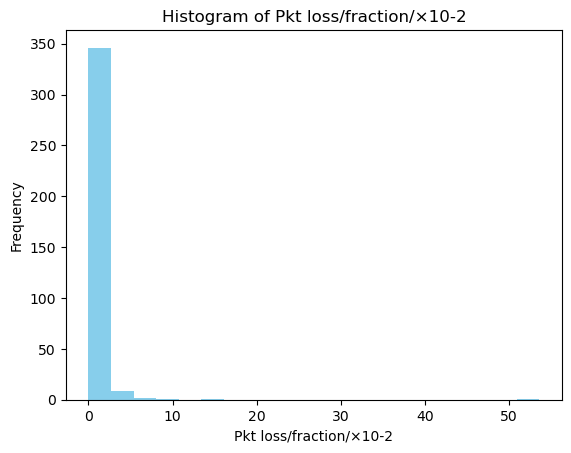

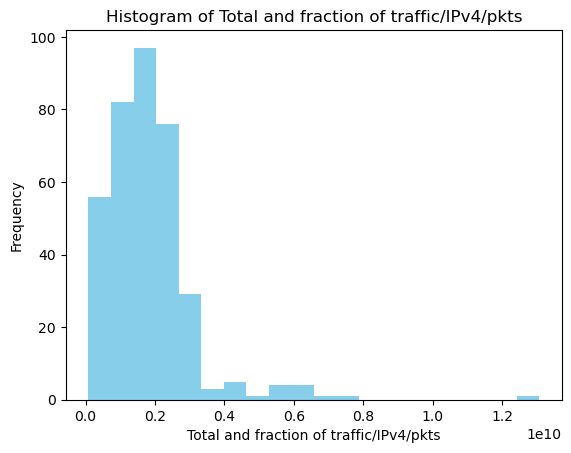

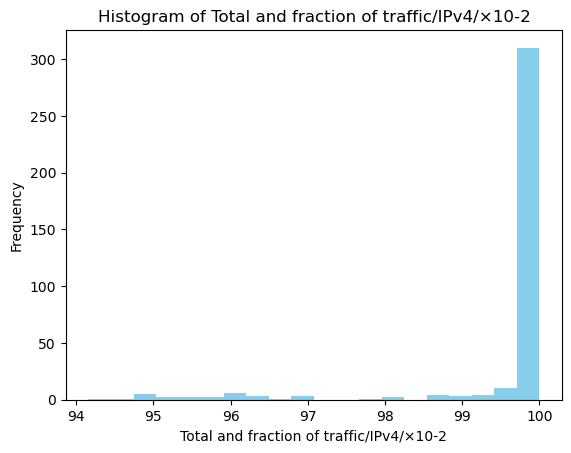

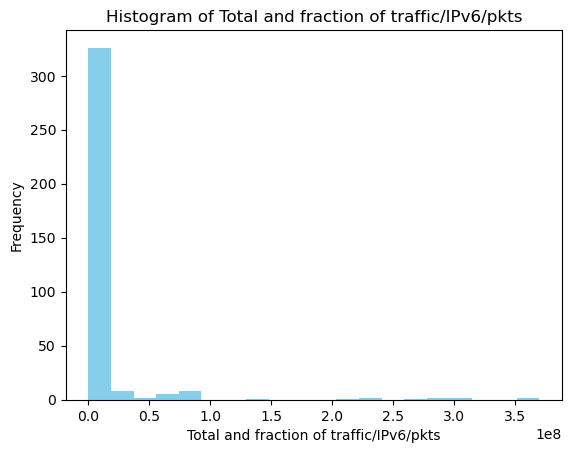

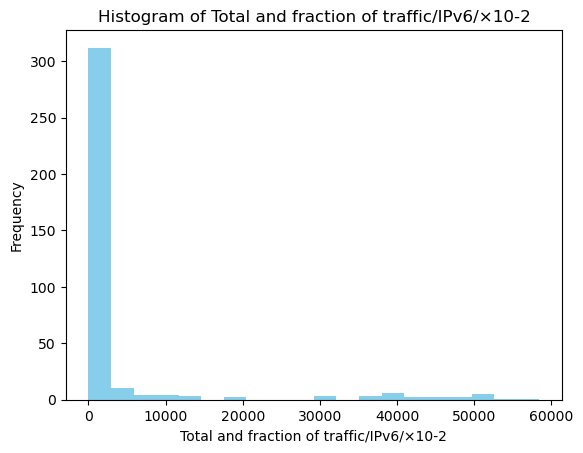

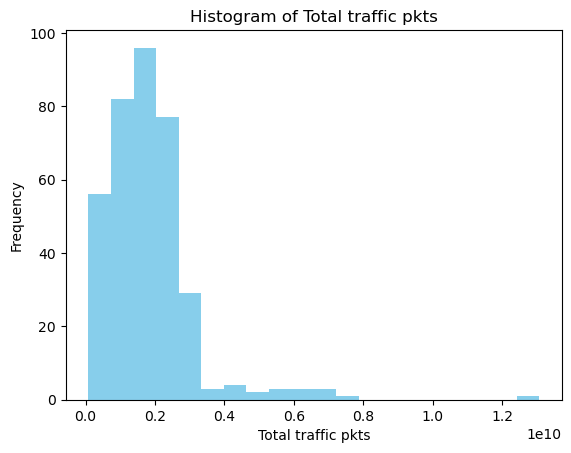

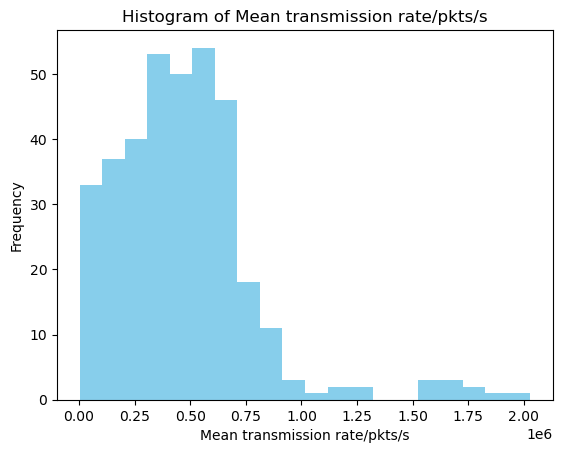

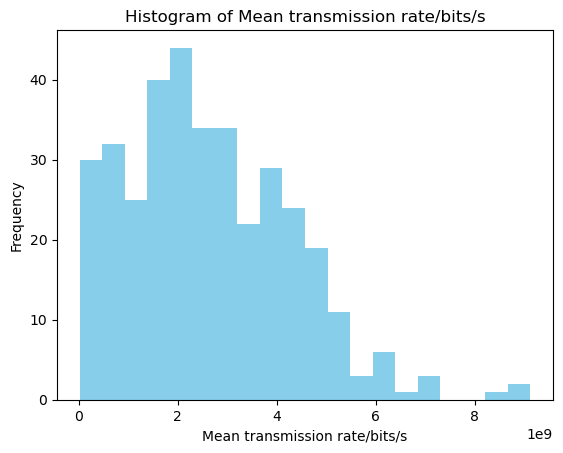

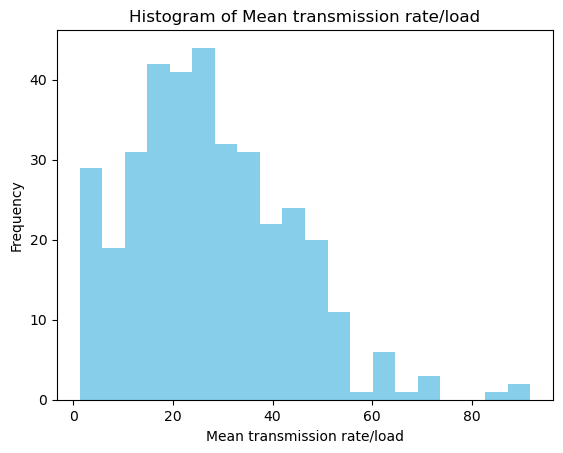

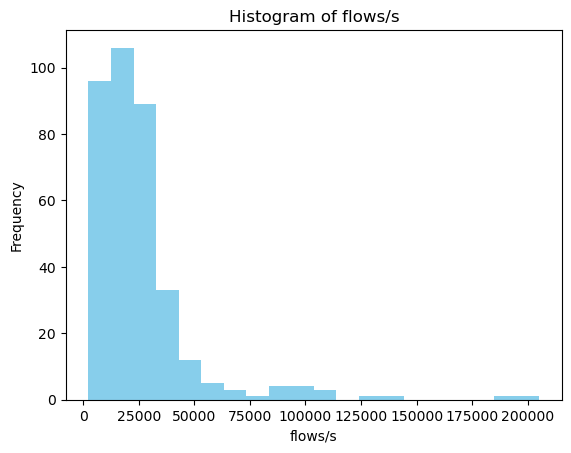

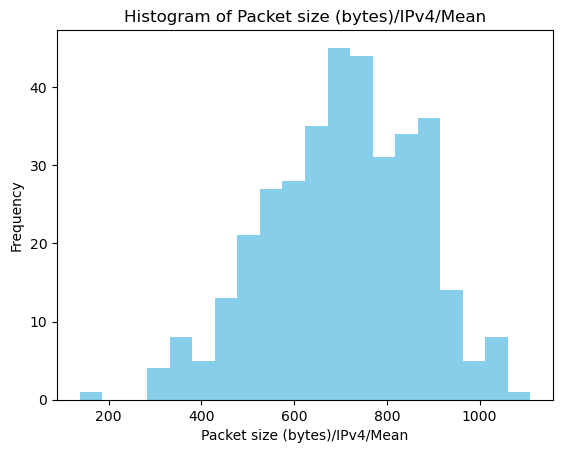

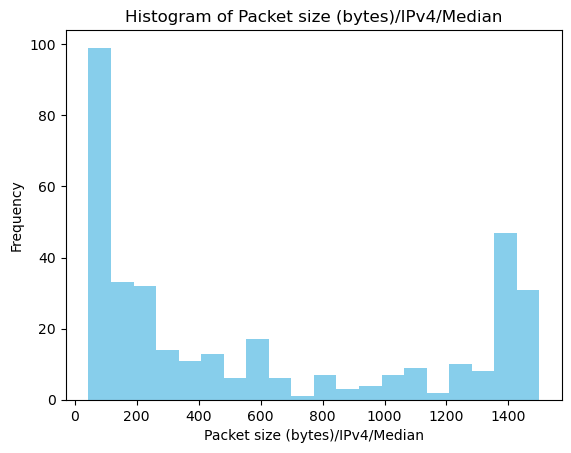

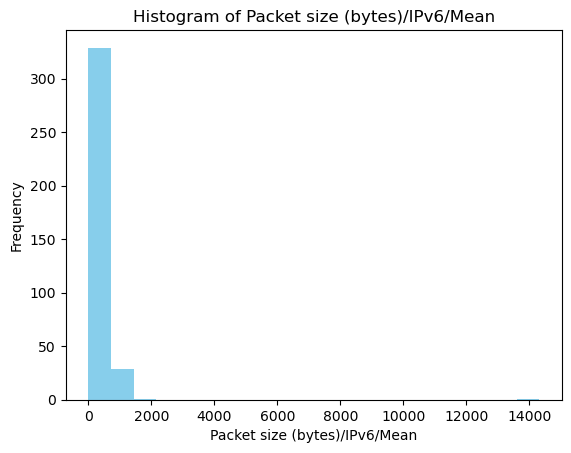

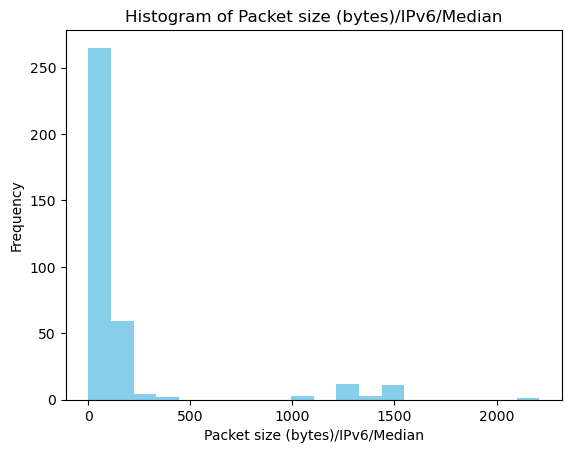

In [23]:
df_encoded_plot = df_encoded.iloc[:, :14]
for column in df_encoded_plot.columns:
    plt.hist(df_encoded_plot[column], bins=20, color='skyblue')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

In [24]:
def replace_outliers_with_mean(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Replace outliers with mean value
    column.loc[column < lower_bound] = column.mean()
    column.loc[column > upper_bound] = column.mean()
    return column

columns_to_process = df_encoded.iloc[:, :7].columns
df_encoded[columns_to_process] = df_encoded[columns_to_process].apply(replace_outliers_with_mean)
    

In [25]:
df_encoded

,Pkt loss/fraction/×10-2,Total and fraction of traffic/IPv4/pkts,Total and fraction of traffic/IPv4/×10-2,Total and fraction of traffic/IPv6/pkts,Total and fraction of traffic/IPv6/×10-2,Total traffic pkts,Mean transmission rate/pkts/s,Mean transmission rate/bits/s,Mean transmission rate/load,flows/s,...,Location_chicago (dirA),Location_chicago (dirB),Location_nyc (dirA),Location_nyc (dirB),Location_oc12-ampath (dirA),Location_oc48-mfn (dirA),Location_oc48-mfn (dirB),Location_oc48-paix (dirB),Location_sanjose (dirA),Location_sanjose (dirB)
1,0.44,2.352824e+09,99.602694,1.275910e+07,3819.313889,2.382272e+09,640220.0,4.550000e+09,45.7,37390.00000,...,0,0,1,0,0,0,0,0,0,0
2,0.44,2.280990e+09,99.602694,1.275910e+07,3819.313889,2.307941e+09,620410.0,4.490000e+09,45.1,31800.00000,...,0,0,1,0,0,0,0,0,0,0
3,0.44,2.366522e+09,99.602694,1.275910e+07,3819.313889,2.386499e+09,641530.0,4.370000e+09,43.9,35410.00000,...,0,0,1,0,0,0,0,0,0,0
4,0.00,2.082251e+09,99.602694,1.275910e+07,3819.313889,2.119546e+09,569770.0,3.530000e+09,35.5,42080.00000,...,0,0,1,0,0,0,0,0,0,0
5,0.00,2.299798e+09,99.602694,1.275910e+07,3819.313889,2.321459e+09,624050.0,4.450000e+09,44.7,29240.00000,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,0.00,8.458139e+07,100.000000,0.000000e+00,0.000000,8.458139e+07,23490.0,9.529000e+07,3.8,25323.78882,...,0,0,0,0,0,1,0,0,0,0
357,0.00,2.197094e+08,100.000000,0.000000e+00,0.000000,2.197094e+08,59070.0,3.215700e+08,12.9,25323.78882,...,0,0,0,0,0,1,0,0,0,0
358,0.00,2.143713e+09,100.000000,0.000000e+00,0.000000,2.143713e+09,74430.0,3.524300e+08,14.2,25323.78882,...,0,0,0,0,0,1,0,0,0,0
359,0.00,2.570977e+08,100.000000,0.000000e+00,0.000000,2.570977e+08,69120.0,2.690400e+08,10.8,25323.78882,...,0,0,0,0,0,0,1,0,0,0


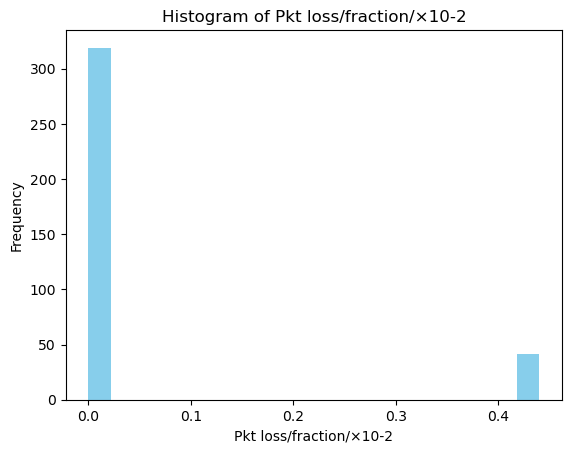

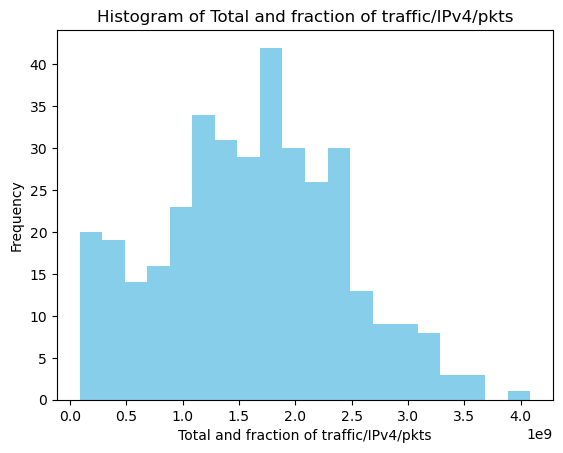

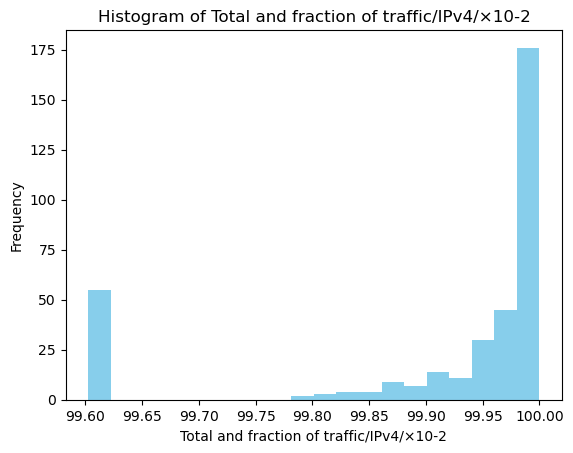

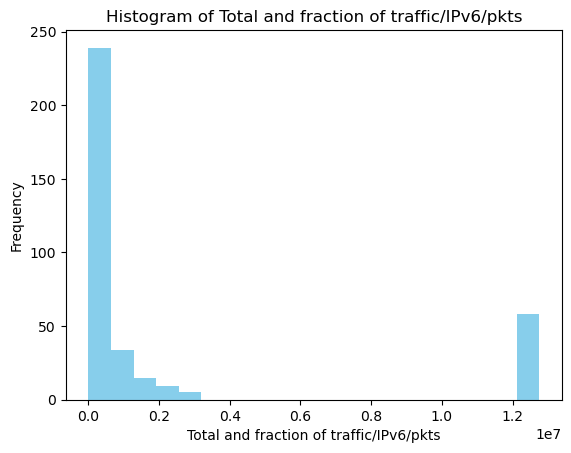

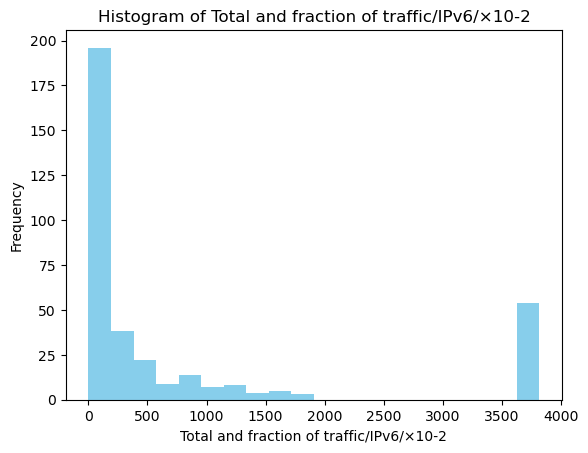

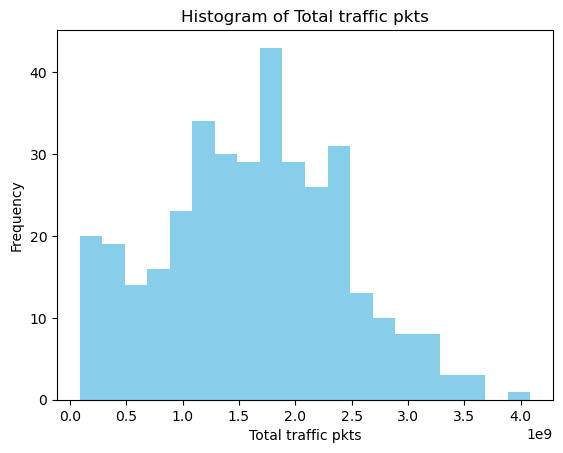

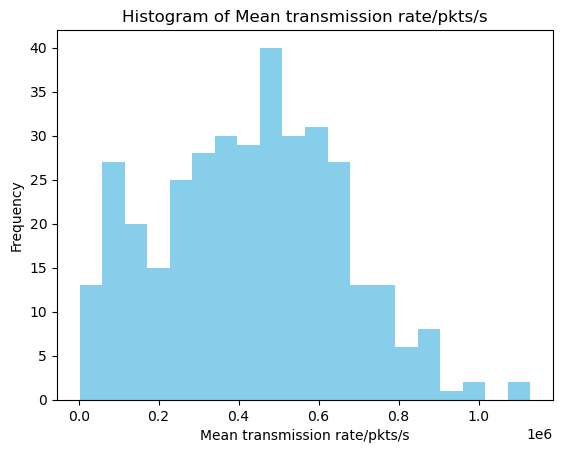

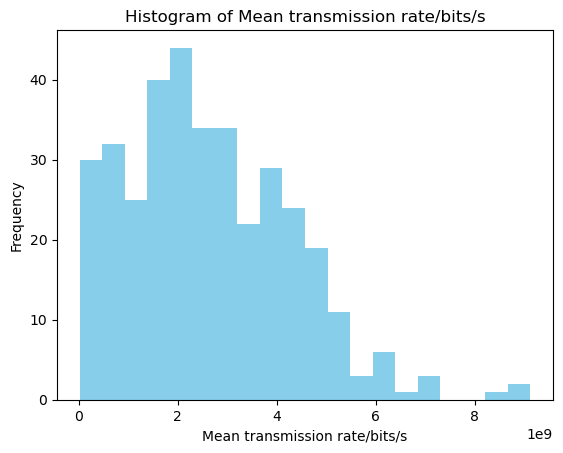

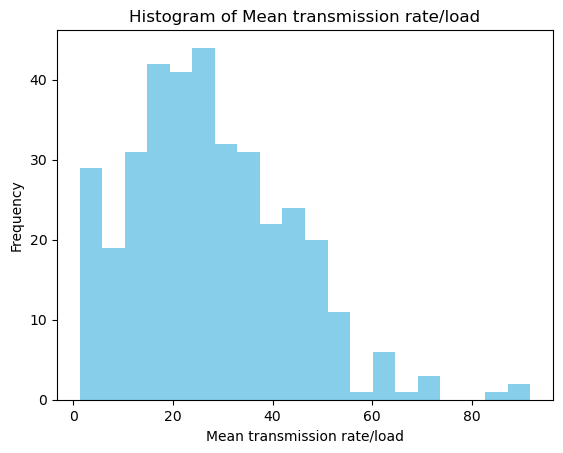

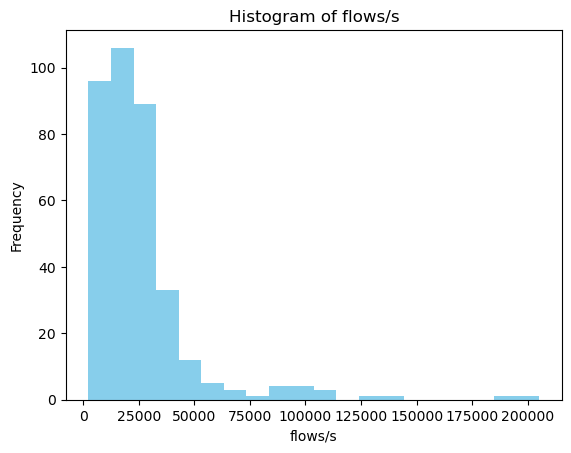

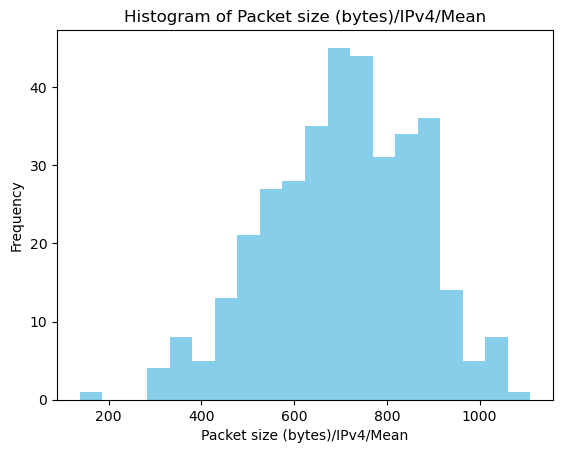

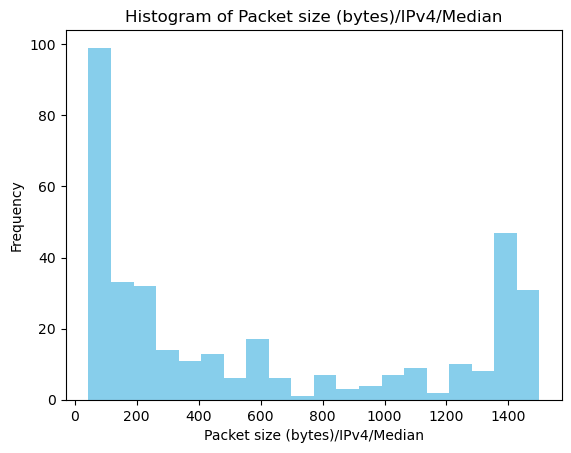

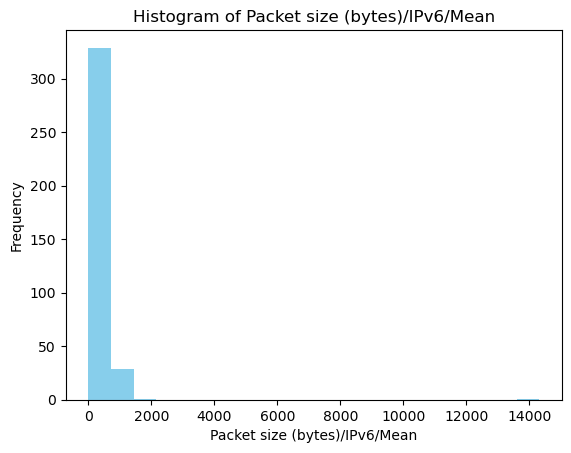

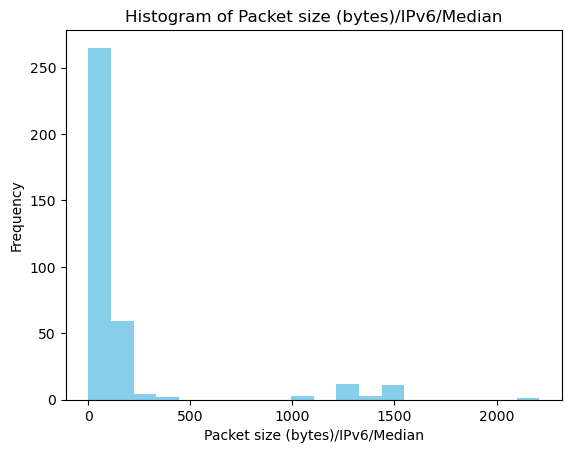

In [26]:
df_encoded_plot = df_encoded.iloc[:, :14]
for column in df_encoded_plot.columns:
    plt.hist(df_encoded_plot[column], bins=20, color='skyblue')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

In [27]:
df_encoded.drop(['Total and fraction of traffic/IPv4/pkts', 'Total and fraction of traffic/IPv6/pkts'], axis = 1, inplace =True)
df_encoded

,Pkt loss/fraction/×10-2,Total and fraction of traffic/IPv4/×10-2,Total and fraction of traffic/IPv6/×10-2,Total traffic pkts,Mean transmission rate/pkts/s,Mean transmission rate/bits/s,Mean transmission rate/load,flows/s,Packet size (bytes)/IPv4/Mean,Packet size (bytes)/IPv4/Median,...,Location_chicago (dirA),Location_chicago (dirB),Location_nyc (dirA),Location_nyc (dirB),Location_oc12-ampath (dirA),Location_oc48-mfn (dirA),Location_oc48-mfn (dirB),Location_oc48-paix (dirB),Location_sanjose (dirA),Location_sanjose (dirB)
1,0.44,99.602694,3819.313889,2.382272e+09,640220.0,4.550000e+09,45.7,37390.00000,896.0,1400.0,...,0,0,1,0,0,0,0,0,0,0
2,0.44,99.602694,3819.313889,2.307941e+09,620410.0,4.490000e+09,45.1,31800.00000,913.0,1400.0,...,0,0,1,0,0,0,0,0,0,0
3,0.44,99.602694,3819.313889,2.386499e+09,641530.0,4.370000e+09,43.9,35410.00000,857.0,1380.0,...,0,0,1,0,0,0,0,0,0,0
4,0.00,99.602694,3819.313889,2.119546e+09,569770.0,3.530000e+09,35.5,42080.00000,785.0,865.0,...,0,0,1,0,0,0,0,0,0,0
5,0.00,99.602694,3819.313889,2.321459e+09,624050.0,4.450000e+09,44.7,29240.00000,896.0,1400.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,0.00,100.000000,0.000000,8.458139e+07,23490.0,9.529000e+07,3.8,25323.78882,507.0,64.0,...,0,0,0,0,0,1,0,0,0,0
357,0.00,100.000000,0.000000,2.197094e+08,59070.0,3.215700e+08,12.9,25323.78882,681.0,315.0,...,0,0,0,0,0,1,0,0,0,0
358,0.00,100.000000,0.000000,2.143713e+09,74430.0,3.524300e+08,14.2,25323.78882,592.0,205.0,...,0,0,0,0,0,1,0,0,0,0
359,0.00,100.000000,0.000000,2.570977e+08,69120.0,2.690400e+08,10.8,25323.78882,487.0,59.0,...,0,0,0,0,0,0,1,0,0,0


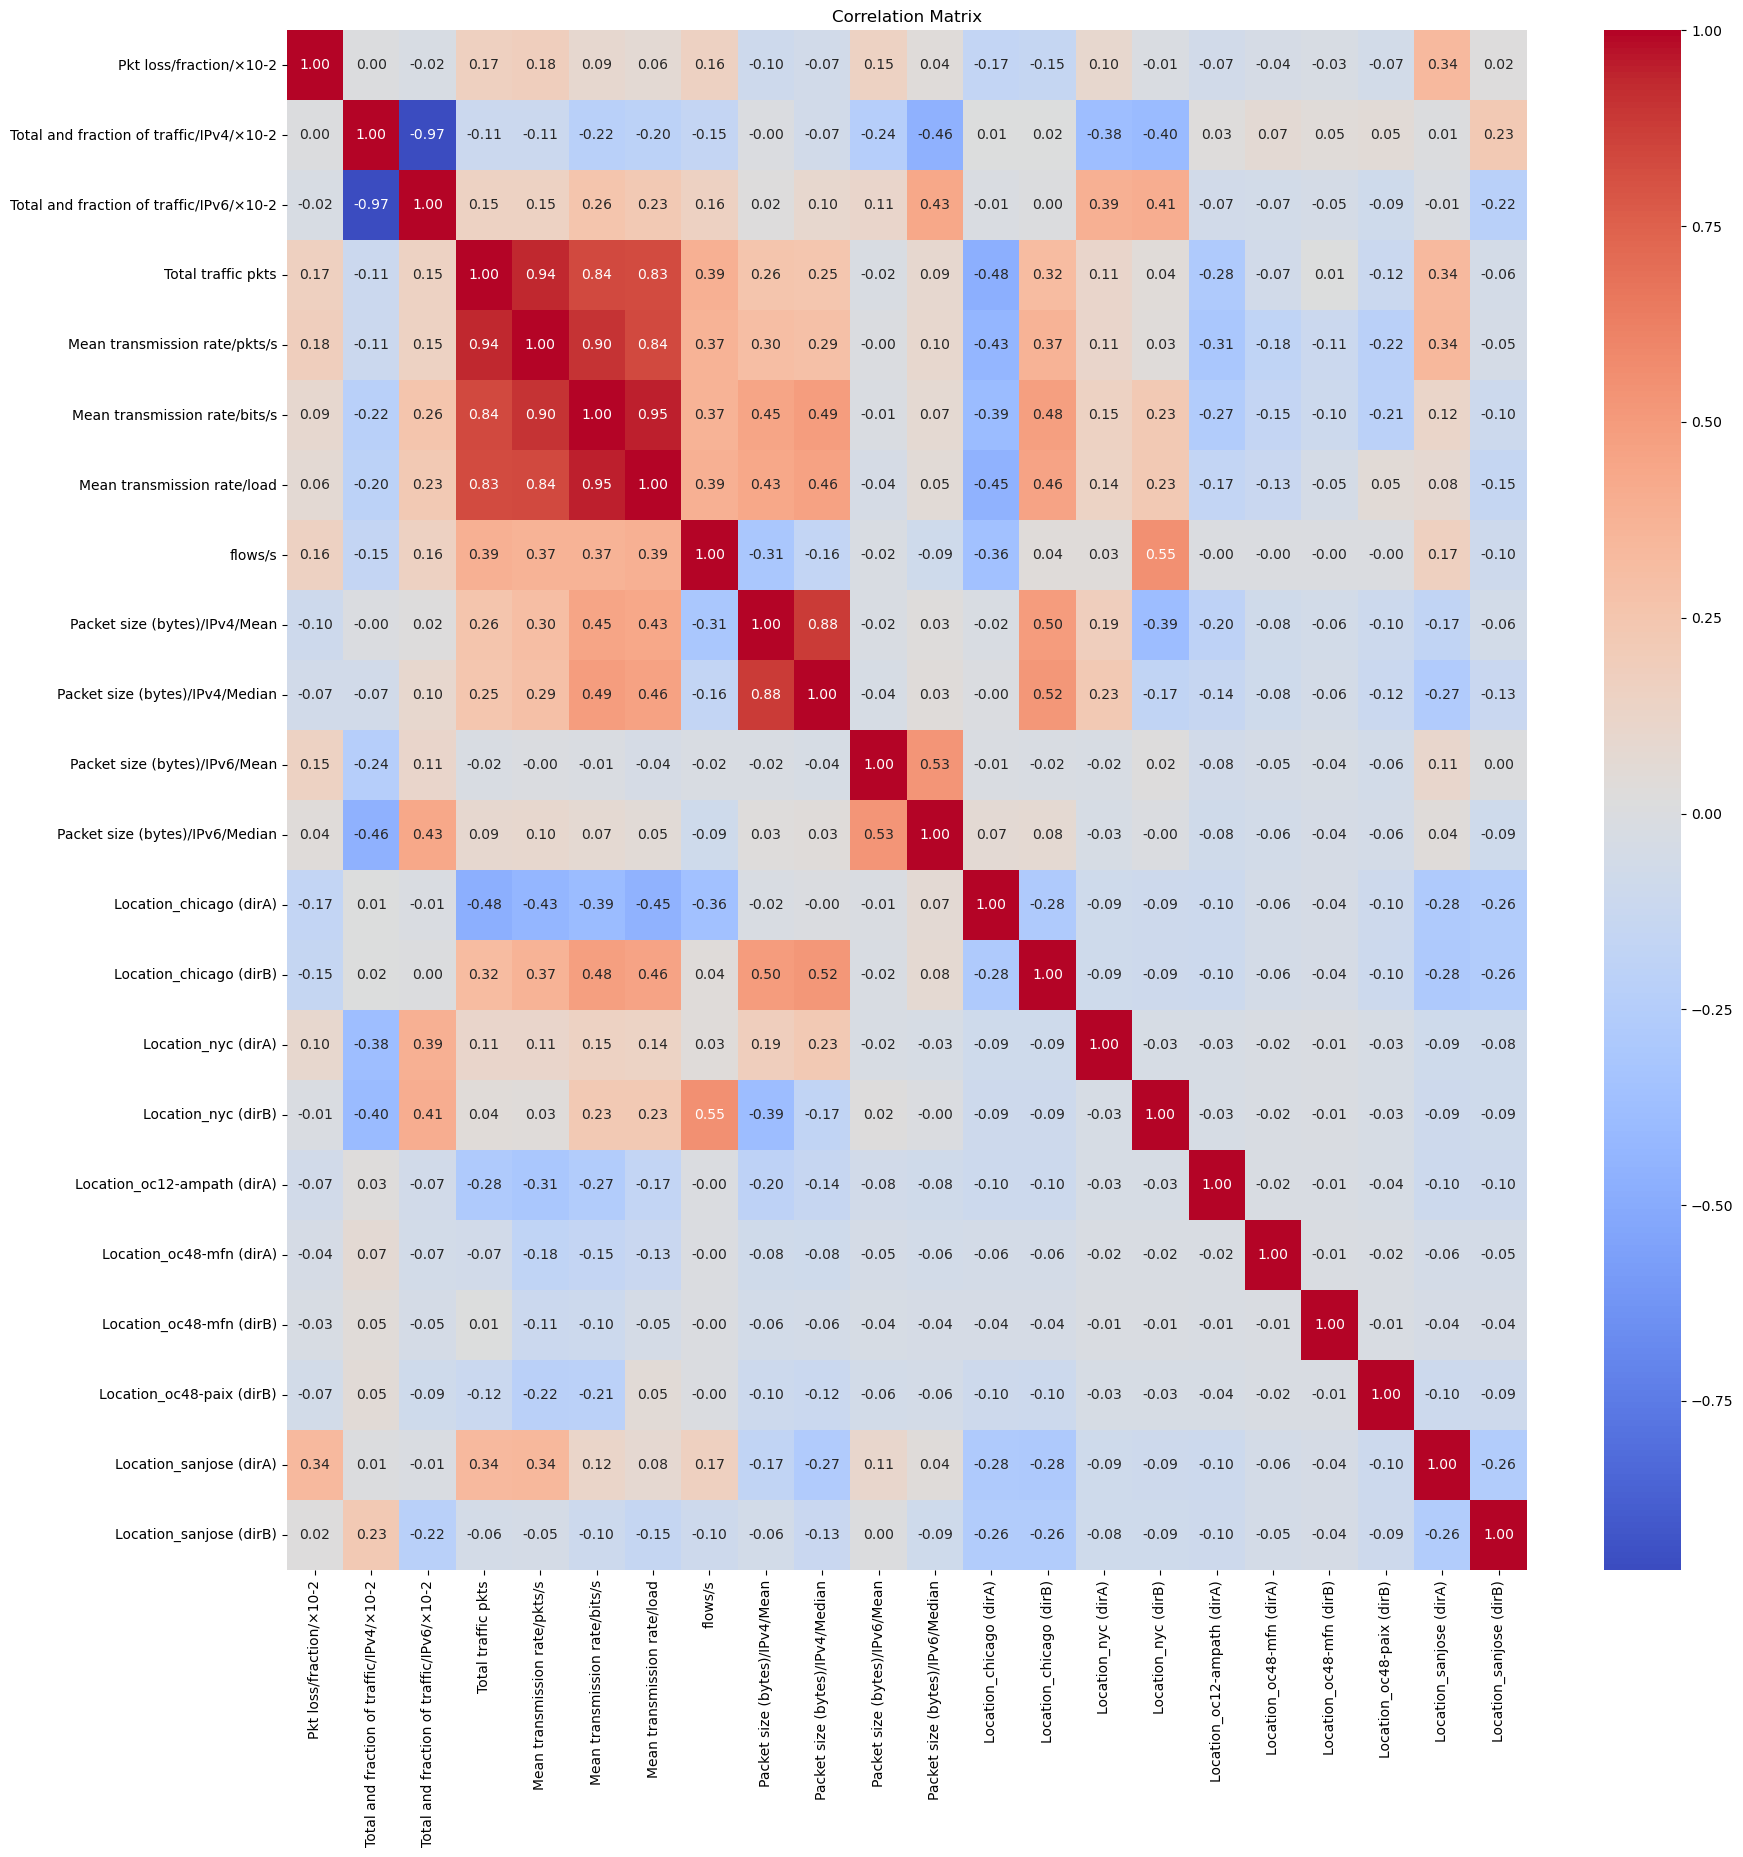

In [28]:
import seaborn as sns
corr_matrix = df_encoded.corr()

# Plot correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [29]:
X = df_encoded.drop(['Total traffic pkts'], axis = 1)
y = df_encoded['Total traffic pkts']

In [30]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
X_scaled = sc.fit_transform(X)


In [31]:
np.unique(X_scaled)

array([0.00000000e+00, 3.63533188e-04, 6.60215853e-04, ...,
       9.93131868e-01, 1.00000000e+00, 1.00000000e+00])

In [32]:
from sklearn.model_selection import train_test_split

# Assuming you have your data in X and y
# X contains the features, y contains the target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [33]:
y_train.shape, y_test.shape

((288,), (72,))

In [34]:
X_train.shape, X_test.shape

((288, 21), (72, 21))

In [35]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression


# Reshape the data to a 3D tensor
# X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
# X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
# Define the 1D CNN model

model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the model performance (e.g., mean squared error)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1.2499941322565229e+17


In [37]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)
y_pred_ridge = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_ridge)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 7.445872722408341e+16


In [38]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1)
model.fit(X_train, y_train)
y_pred_lasso = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_lasso)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1.249995082866233e+17


C:\Users\nidhi\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.971e+18, tolerance: 1.738e+16
  model = cd_fast.enet_coordinate_descent(


In [40]:
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = keras.Sequential([
    layers.Conv1D(64, 3, padding='same', activation='relu', input_shape=(21, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling1D(2),
    layers.Conv1D(128, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling1D(2),
    layers.Conv1D(256, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling1D(2),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam',loss='mse')  # Mean Absolute Error metric

# Train the model
model.fit(X_train_cnn, y_train, epochs=50, batch_size=8, validation_split=0.2)

# Evaluate the model
model.evaluate(X_test_cnn, y_test)

Epoch 1/50
29/29 [==============================] - 4s 27ms/step - loss: 3391005735369310208.0000 - val_loss: 3036492675126657024.0000
Epoch 2/50
29/29 [==============================] - 0s 13ms/step - loss: 3390996114642567168.0000 - val_loss: 3036492400248750080.0000
Epoch 3/50
29/29 [==============================] - 0s 9ms/step - loss: 3390950210032107520.0000 - val_loss: 3036490476103401472.0000
Epoch 4/50
29/29 [==============================] - 0s 10ms/step - loss: 3390824590828634112.0000 - val_loss: 3036486352934797312.0000
Epoch 5/50
29/29 [==============================] - 0s 7ms/step - loss: 3390546689264713728.0000 - val_loss: 3036469310504566784.0000
Epoch 6/50
29/29 [==============================] - 0s 8ms/step - loss: 3390033492212449280.0000 - val_loss: 3036415984190619648.0000
Epoch 7/50
29/29 [==============================] - 0s 9ms/step - loss: 3389194289962549248.0000 - val_loss: 3036325549359235072.0000
Epoch 8/50
29/29 [==============================] - 0s 8ms/

7.088319192440504e+17